In [1]:
import numpy as np
import pickle
from sklearn import metrics
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from collections import Counter

import os
import pandas as pd

from ast import literal_eval
from utils import flatten


In [2]:
all_cols = [
    'present_prim_tags',
    'present_sec_tags',
    'sectors',
    'pillars_1d',
    'pillars_2d',
    'gender',
    'age',
    'specific_needs_groups',
    'affected_groups_levels_2_3',
    'gender_snorkel',
    'subpillars_1d',
    'subpillars_2d',
    'pillars'
    ]

In [3]:
DATA_PATH = os.path.join(
    '..', '..', '..', '..', "data", "frameworks_data", 'data_v0.7.1'
)

tot_df = pd.read_csv(os.path.join(DATA_PATH, 'new_columns_train_val.csv')).drop(columns=['excerpt']).drop_duplicates()
"""predicted_df = pd.read_csv('predictions_model_prim_tags_v1.csv')
"""
for col in all_cols:
    tot_df[col] = tot_df[col].apply(
        lambda x: [item for item in literal_eval(x) if item!='NOT_MAPPED']
    )    
    """predicted_df[col] = predicted_df[col].apply(
        lambda x: [item for item in literal_eval(x) if item!='NOT_MAPPED']
    )    """

/home/selim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


KeyError: 'pillars'

In [6]:
predicted_df = pd.read_csv('predictions_model_prim_tags_v1.csv')

for col in ['sectors', 'subpillars_2d', 'subpillars_1d']:
  
    predicted_df[col] = predicted_df[col].apply(
        lambda x: [item for item in literal_eval(x) if item!='NOT_MAPPED']
    )   

In [7]:
tot_df[tot_df.subpillars_2d.apply(
    lambda x: 'Humanitarian Conditions->Number Of People In Need' in x and 'Humanitarian Conditions->Physical And Mental Well Being' in x
    )]['subpillars_2d']

2063      [Humanitarian Conditions->Physical And Mental ...
4042      [Humanitarian Conditions->Physical And Mental ...
4339      [Humanitarian Conditions->Physical And Mental ...
4842      [Humanitarian Conditions->Physical And Mental ...
7444      [Priority Needs->Expressed By Population, At R...
                                ...                        
99108     [Humanitarian Conditions->Physical And Mental ...
99298     [Humanitarian Conditions->Physical And Mental ...
100607    [Humanitarian Conditions->Physical And Mental ...
101023    [Humanitarian Conditions->Physical And Mental ...
101563    [Humanitarian Conditions->Physical And Mental ...
Name: subpillars_2d, Length: 202, dtype: object

In [5]:
def get_occurances(list_preds):
    occurances = dict(Counter(list_preds))
    sum_proportions = sum(list(occurances.values()))
    sorted_names = sorted(list(occurances.keys()))
    occurances = {key:np.round(occurances[key], 3) for key in sorted_names}
    return occurances

In [17]:
tot_df['pillars_1d'] = tot_df['pillars_1d'].apply(
    lambda x: [item for item in x if item!='NOT_MAPPED']
)    
pillars_tags_1d = sorted(list(set(flatten(tot_df.pillars_1d))))
pillars_tags_1d

['Casualties',
 'Context',
 'Covid-19',
 'Displacement',
 'Humanitarian Access',
 'Information And Communication',
 'Shock/Event']

In [19]:
tot_df['pillars_2d'] = tot_df['pillars_2d'].apply(
    lambda x: [item for item in x if item!='NOT_MAPPED']
)    
pillars_tags_2d = sorted(list(set(flatten(tot_df.pillars_2d))))
pillars_tags_2d

['At Risk',
 'Capacities & Response',
 'Humanitarian Conditions',
 'Impact',
 'Priority Interventions',
 'Priority Needs']

In [23]:
general_ocurances = {}
restricted_df = tot_df#[tot_df.apply(lambda x: len(x.pillars)>0, axis=1) ]
for tag in pillars_tags_1d:

    specfic_tag_sectors = restricted_df[restricted_df.pillars_1d.apply(lambda x: tag in x)]
    subpillars_2d_specific_sector = flatten(specfic_tag_sectors.pillars_1d)

    occurances = get_occurances(subpillars_2d_specific_sector)
    general_ocurances[tag] = occurances

returned_df = pd.DataFrame.from_dict(general_ocurances).fillna(0)
#returned_df = returned_df[returned_df.index.isin(not_represented_tags)]



In [24]:
returned_df



,Casualties,Context,Covid-19,Displacement,Humanitarian Access,Information And Communication,Shock/Event
Casualties,3135,942,54,273,104,26,251
Context,942,20019,339,1979,709,96,972
Covid-19,54,339,13484,57,69,54,140
Displacement,273,1979,57,10152,208,63,433
Humanitarian Access,104,709,69,208,2994,60,164
Information And Communication,26,96,54,63,60,1143,71
Shock/Event,251,972,140,433,164,71,6554


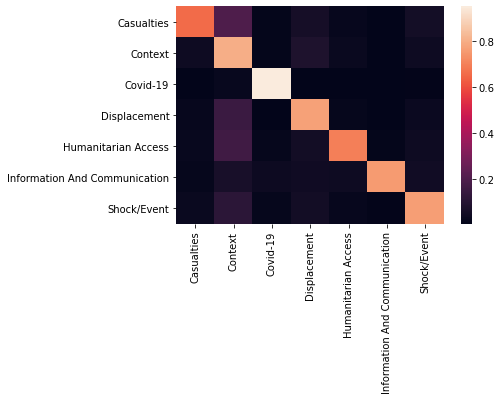

In [26]:
plt.figure()
sns.heatmap(returned_df.div(returned_df.values.sum(axis=1), axis=0))
plt.show()


In [9]:
returned_df = returned_df.div(returned_df.sum(axis=1), axis=0).drop(columns=['Cross'])
returned_df

,Logistics,Agriculture,Protection,Nutrition,Livelihoods,Education,WASH,Shelter,Health,Food Security
Chronically Ill,0.001536,0.000000,0.139785,0.039939,0.073733,0.012289,0.035330,0.044547,0.612903,0.039939
Female Head of Household,0.010453,0.001742,0.315331,0.024390,0.205575,0.026132,0.052265,0.085366,0.094077,0.184669
Indigenous people,0.009213,0.005670,0.359320,0.028349,0.063076,0.062367,0.104890,0.048901,0.209780,0.108434
Minorities,0.007864,0.006553,0.444299,0.015727,0.065531,0.049803,0.085190,0.058978,0.211009,0.055046
Persons with Disability,0.005752,0.001643,0.292523,0.016434,0.109285,0.093673,0.085456,0.052588,0.294166,0.048480
Pregnant or Lactating Women,0.001016,0.001524,0.120366,0.250889,0.041138,0.020315,0.030980,0.025901,0.439817,0.068055
Unaccompanied or Separated Children,0.001538,0.000000,0.678462,0.026154,0.038462,0.047692,0.030769,0.040000,0.109231,0.027692
Single Women (including Widows),0.000000,0.006623,0.549669,0.006623,0.139073,0.006623,0.033113,0.099338,0.086093,0.072848
Child Head of Household,0.000000,0.000000,0.533898,0.033898,0.101695,0.042373,0.059322,0.059322,0.110169,0.059322
Elderly Head of Household,0.000000,0.000000,0.250000,0.021739,0.217391,0.021739,0.086957,0.076087,0.260870,0.065217


In [19]:
for tag in sectors_tags:

    specfic_tag_sectors = predicted_df[predicted_df.sectors.apply(lambda x: tag in x)]
    subpillars_2d_specific_sector = flatten(specfic_tag_sectors.subpillars_2d)

    occurances = get_occurances(subpillars_2d_specific_sector)
    general_ocurances[tag] = occurances

returned_df = pd.DataFrame.from_dict(general_ocurances).fillna(0).drop(columns=['Cross'])

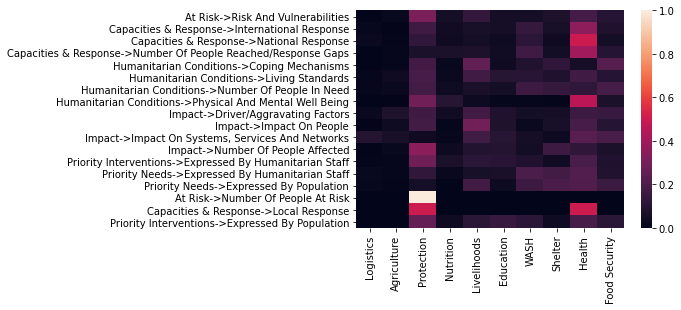

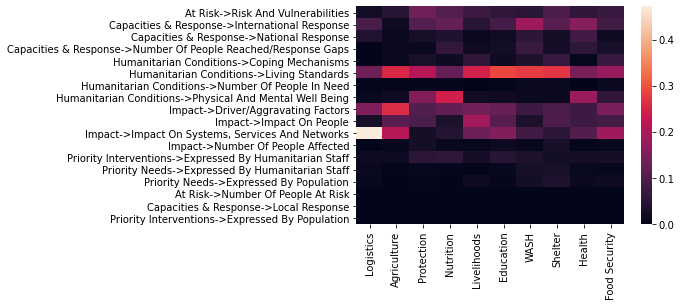

In [20]:
plt.figure()
sns.heatmap(returned_df.div(returned_df.sum(axis=1), axis=0))
plt.show()

plt.figure()
sns.heatmap(returned_df.div(returned_df.sum(axis=0), axis=1))
plt.show()